In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
df.shape

(101, 18)

In [5]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
#df.drop(['animal name', 'type'], axis=1).boxplot(figsize=(12,6))
#plt.xticks(rotation=90)
#plt.show()

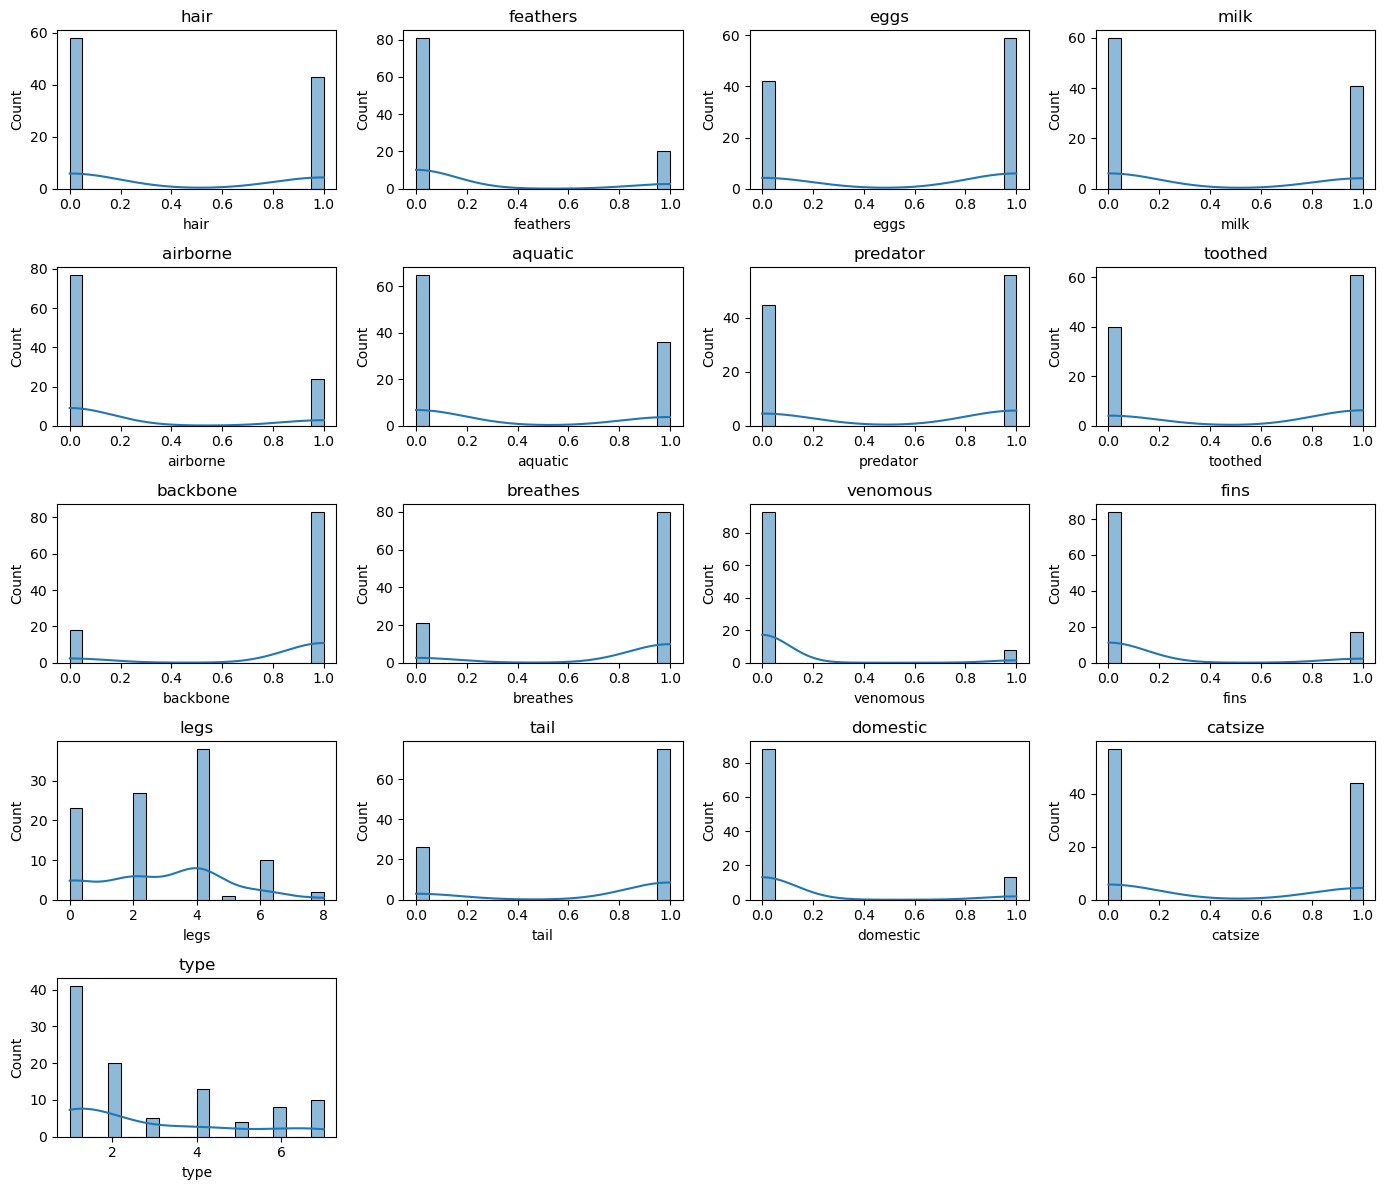

In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(14, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//4 + 1, 4, i)  
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

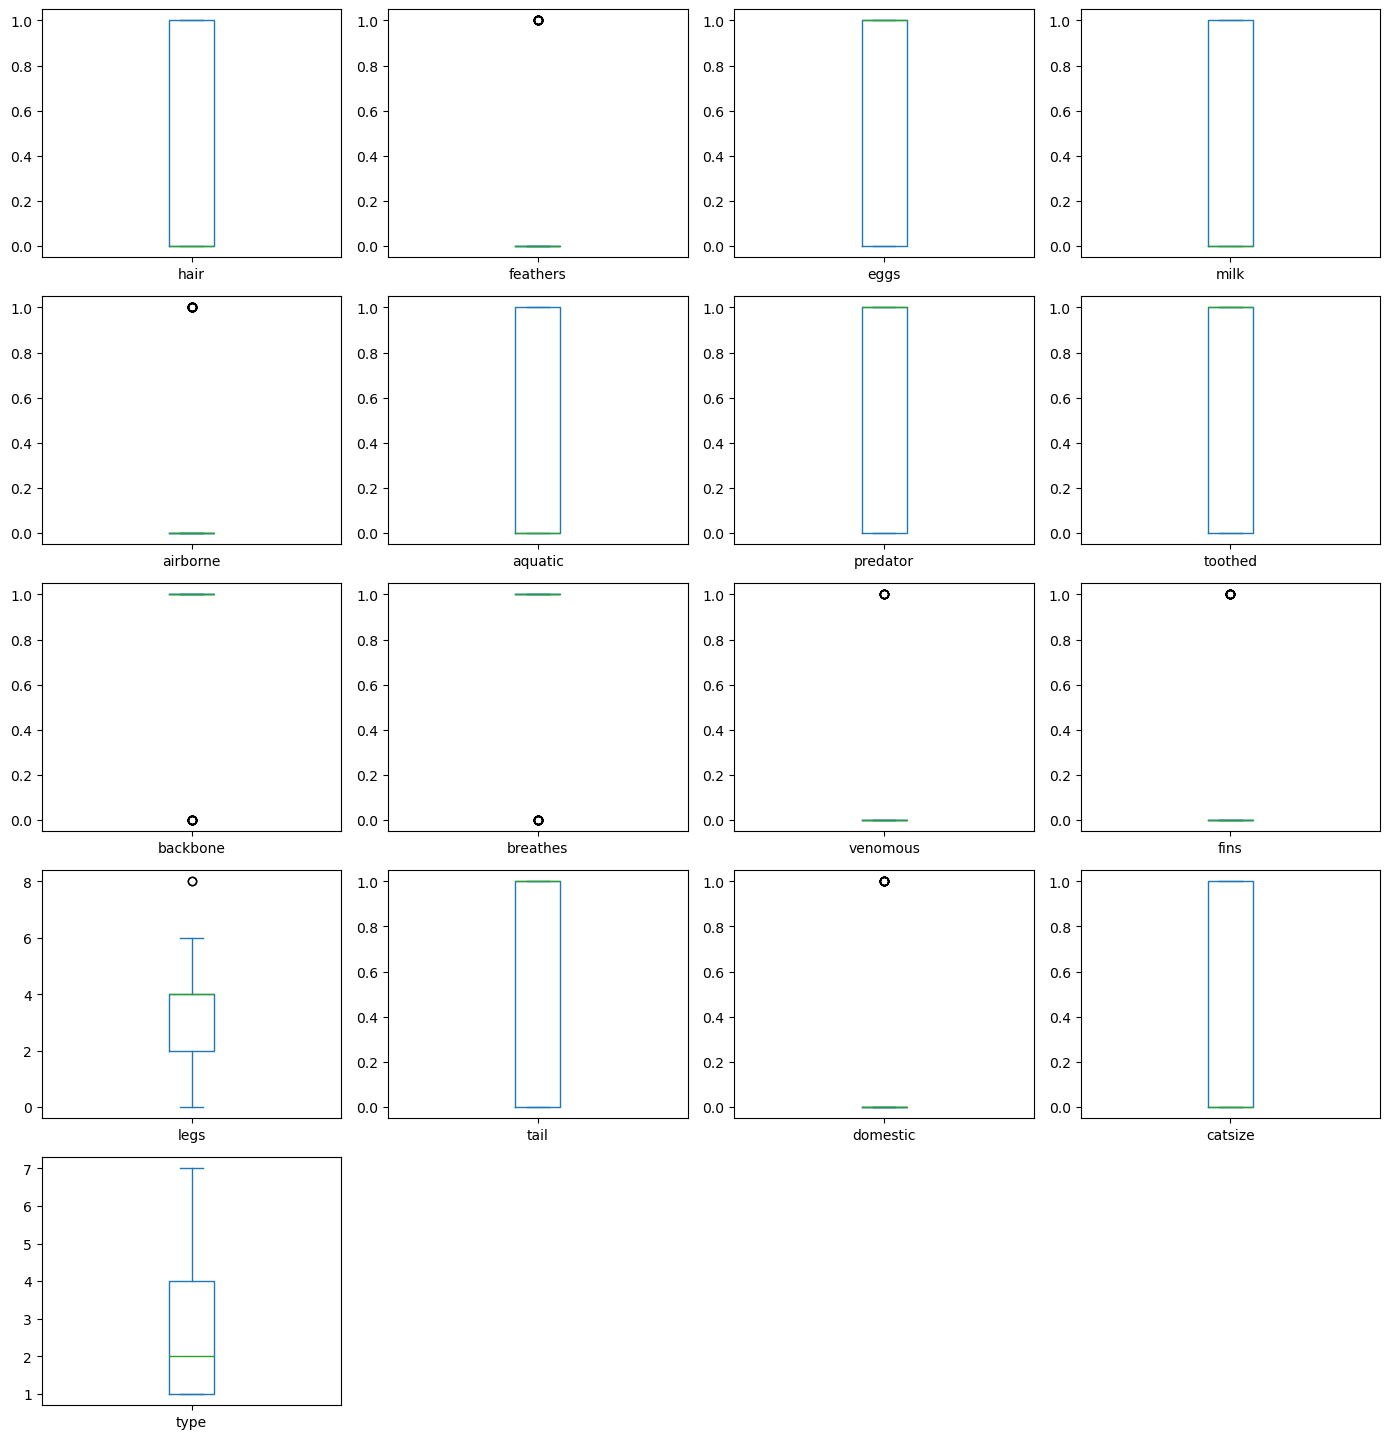

In [9]:
import math
num_cols = len(df.select_dtypes(include = 'int').columns)
rows = math.ceil(num_cols/4)
df.plot(kind = 'box', 
        subplots = True, 
        layout=(7, 4),
        
        figsize =(14, 20), 
        sharex = False, 
        sharey = False)

plt.title('BarPlot')
plt.tight_layout()
plt.show()

In [10]:
#num_cols = df.select_dtypes(include = ['int64', 'float64']).columns 

In [11]:
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y, test_size=0.2, random_state=42)

In [15]:
len(X_train)

80

In [16]:
len(X_test)

21

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [18]:
y_pred = knn.predict(X_test)

In [19]:
print(y_pred)

[1 1 1 1 1 2 1 1 1 1 4 2 2 2 7 1 1 2 4 1 4]


In [20]:
accuracy_score = (y_test, y_pred)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.40      1.00      0.57         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.81        21
   macro avg       0.51      0.67      0.56        21
weighted avg       0.72      0.81      0.75        21



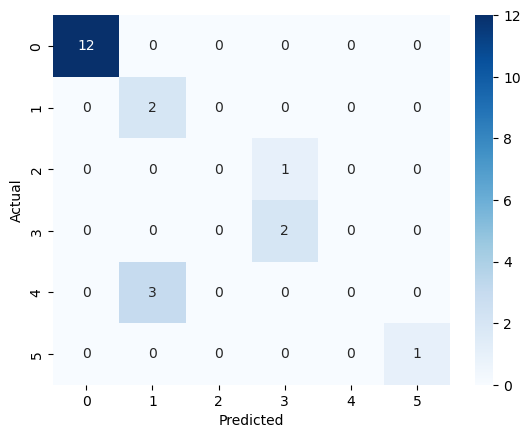

In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

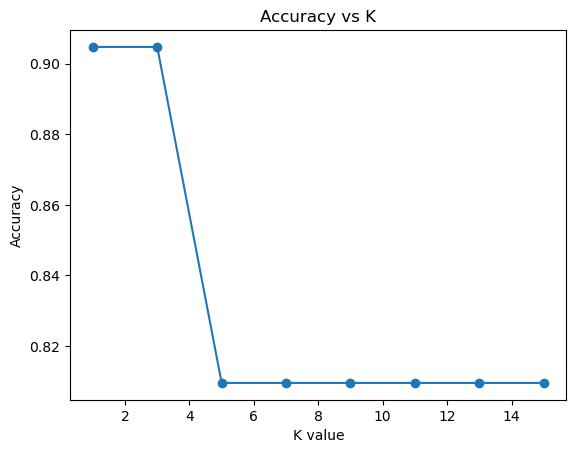

In [23]:
k_values = range(1, 16, 2)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.show()

In [24]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', edgecolor='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('KNN Decision Boundary')
    plt.show()


X_train_np = X_train.values
y_train_np = y_train.values

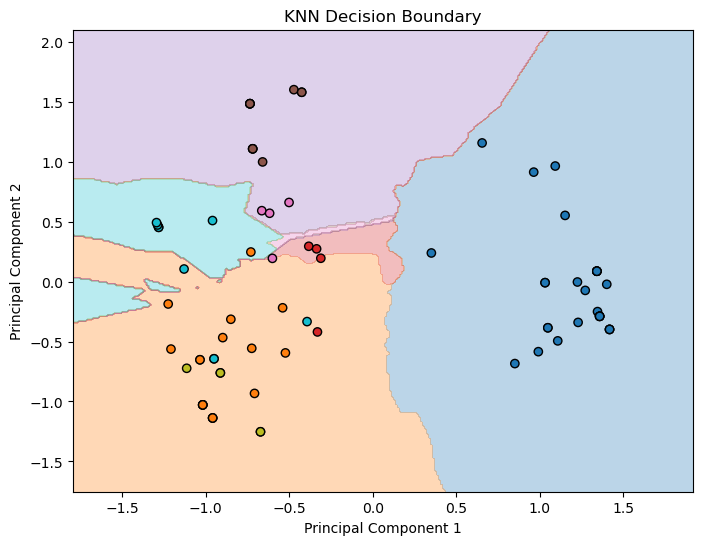

In [25]:
plot_decision_boundary(knn, X_train, y_train)

## Interview Question

1. What are the key hyperparameters in KNN?

The most important hyperparameter in KNN is K, which decides how many nearby data points are used to make a prediction. A small K can lead to overfitting, while a large K can smooth predictions but may underfit.

Another key hyperparameter is the distance metric, which defines how similarity between data points is measured.

The weighting method is also important. Neighbors can contribute equall or closer neighbors can have more influence.

2. What distance metrics can be used in KNN?

KNN can use different distance metrics depending on the type of data.
Euclidean distance is commonly used for continuous numerical data.
Manhattan distance works well when features represent grid-like paths.
Minkowski distance is a generalized form that includes both Euclidean and Manhattan distances.
Cosine distance is useful for high-dimensional data such as text.
Hamming distance is used for categorical or binary data.